# Slide 1: Introduction
Understanding Loss Functions in Machine Learning

- Importance of loss functions in model training
- Brief overview of what's to come: Mean Squared Error (MSE) and Cross-Entropy Loss


# Slide 2: Mean Squared Error (MSE) Loss
Used for regression tasks

- Measures the average of squared differences between predictions and actual values


### More Detailed MSE Example

In this example, we're simulating a scenario where we're predicting some continuous variable - let's say it's the price of different types of houses, in thousands of dollars.

The `y_true` values represent the actual prices of four houses: $3,000, $500 (a really cheap house!), $2,000, and $7,000.

The `y_pred` values represent our model's predictions for these same four houses: $2,500, $0 (our model thinks this house is free!), $2,000, and $8,000.

The Mean Squared Error (MSE) takes each prediction error (the difference between the true value and the predicted value), squares it (to ensure it's positive and to amplify larger errors), and then takes the average over all errors.

In this case, our MSE comes out to {mse}. This number by itself may not mean much, but when we compare it to the MSEs from other models, it helps us understand if our model is doing better or worse. In general, a lower MSE means a better performing model.


In [70]:
# Demonstrate MSE with a simple example
import numpy as np
from sklearn.metrics import mean_squared_error

# actual and predicted values
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

# Calculation of errors
errors = y_true - y_pred

# Squaring the errors
squared_errors = np.square(errors)

# Mean Squared Error
mse = np.mean(squared_errors)

# Print the result
print(f"The Mean Squared Error of the predictions is {mse}")

The Mean Squared Error of the predictions is 0.375


The Mean Error of the predictions is -25.0
The Error of the predictions are [  50.  -50.    0. -100.]
The Mean Squared Error of the predictions is 3750.0
The Error of the predictions are [ 2500.  2500.     0. 10000.]


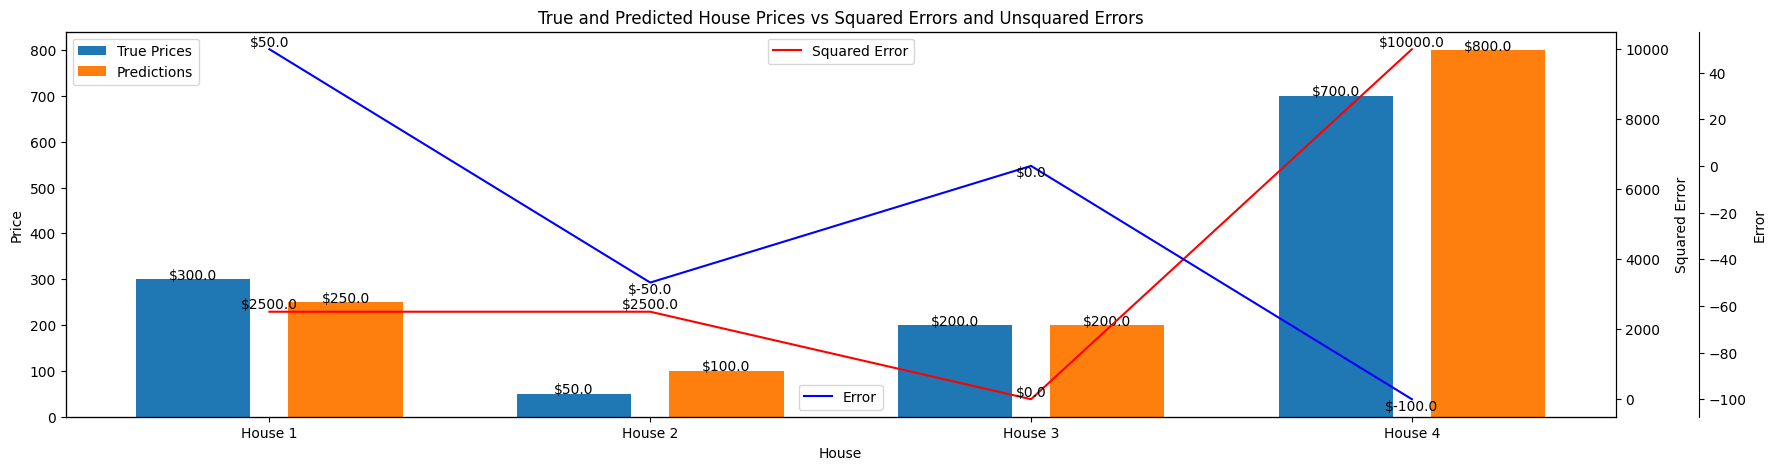

In [71]:
import matplotlib.pyplot as plt

# actual and predicted values multiplied by 1000 for a better visual
y_true = np.array([3, 0.5, 2, 7]) * 100
y_pred = np.array([2.5, 1, 2, 8]) * 100

# Calculation of errors
errors = y_true - y_pred

# Squaring the errors
squared_errors = np.square(errors)

me = np.mean(errors)

# Mean Squared Error
mse = np.mean(squared_errors)
# Print the result
print(f"The Mean Error of the predictions is {me}")
print(f"The Error of the predictions are {errors}")

# Print the result
print(f"The Mean Squared Error of the predictions is {mse}")
print(f"The Error of the predictions are {squared_errors}")

# Create a new figure
fig, ax1 = plt.subplots(figsize=(20, 5))

# Create an array with the indices
x = np.array(range(len(y_true)))

# Width of a bar 
width = 0.3       

# Plotting the prices
ax1.bar(x - 0.2, y_true, width, label='True Prices')
ax1.bar(x + 0.2, y_pred, width, label='Predictions')

# Adding price labels
for i in range(len(y_true)):
    ax1.text(i - 0.2, y_true[i] , f'${y_true[i]}', ha = 'center')
    ax1.text(i + 0.2, y_pred[i] , f'${y_pred[i]}', ha = 'center')

# Adding labels 
ax1.set_xlabel('House') 
ax1.set_ylabel('Price')
ax1.set_title('True and Predicted House Prices vs Squared Errors and Unsquared Errors') 

# Add a legend
ax1.legend(loc='upper left')

# Adding a second y axis for the errors
ax2 = ax1.twinx()

# Plotting the squared errors
ax2.plot(x, squared_errors, 'r-', label='Squared Error')

# Adding labels for the squared errors
for i in range(len(squared_errors)):
    ax2.text(i, squared_errors[i], f'${squared_errors[i]}', ha = 'center', va='bottom')

ax2.set_ylabel('Squared Error')
ax2.legend(loc='upper center')

# Adding a third y axis for the unsquared errors
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))

# Plotting the unsquared errors
ax3.plot(x, errors, 'b-', label='Error')

# Adding labels for the unsquared errors
for i in range(len(errors)):
    ax3.text(i, errors[i], f'${errors[i]}', ha = 'center', va='bottom' if errors[i]>0 else 'top')

ax3.set_ylabel('Error')
ax3.legend(loc='lower center')

# Updating the x-axis ticks
ax1.set_xticks(x)
ax1.set_xticklabels([f'House {i+1}' for i in x])

# Display the plot
plt.show()


The Absolute Mean Error of the predictions is 4.0
The Absolute Mean Error of the predictions are [5. 5. 0. 6.]
The Mean Squared Error of the predictions is 21.5
The Error of the predictions are [25. 25.  0. 36.]


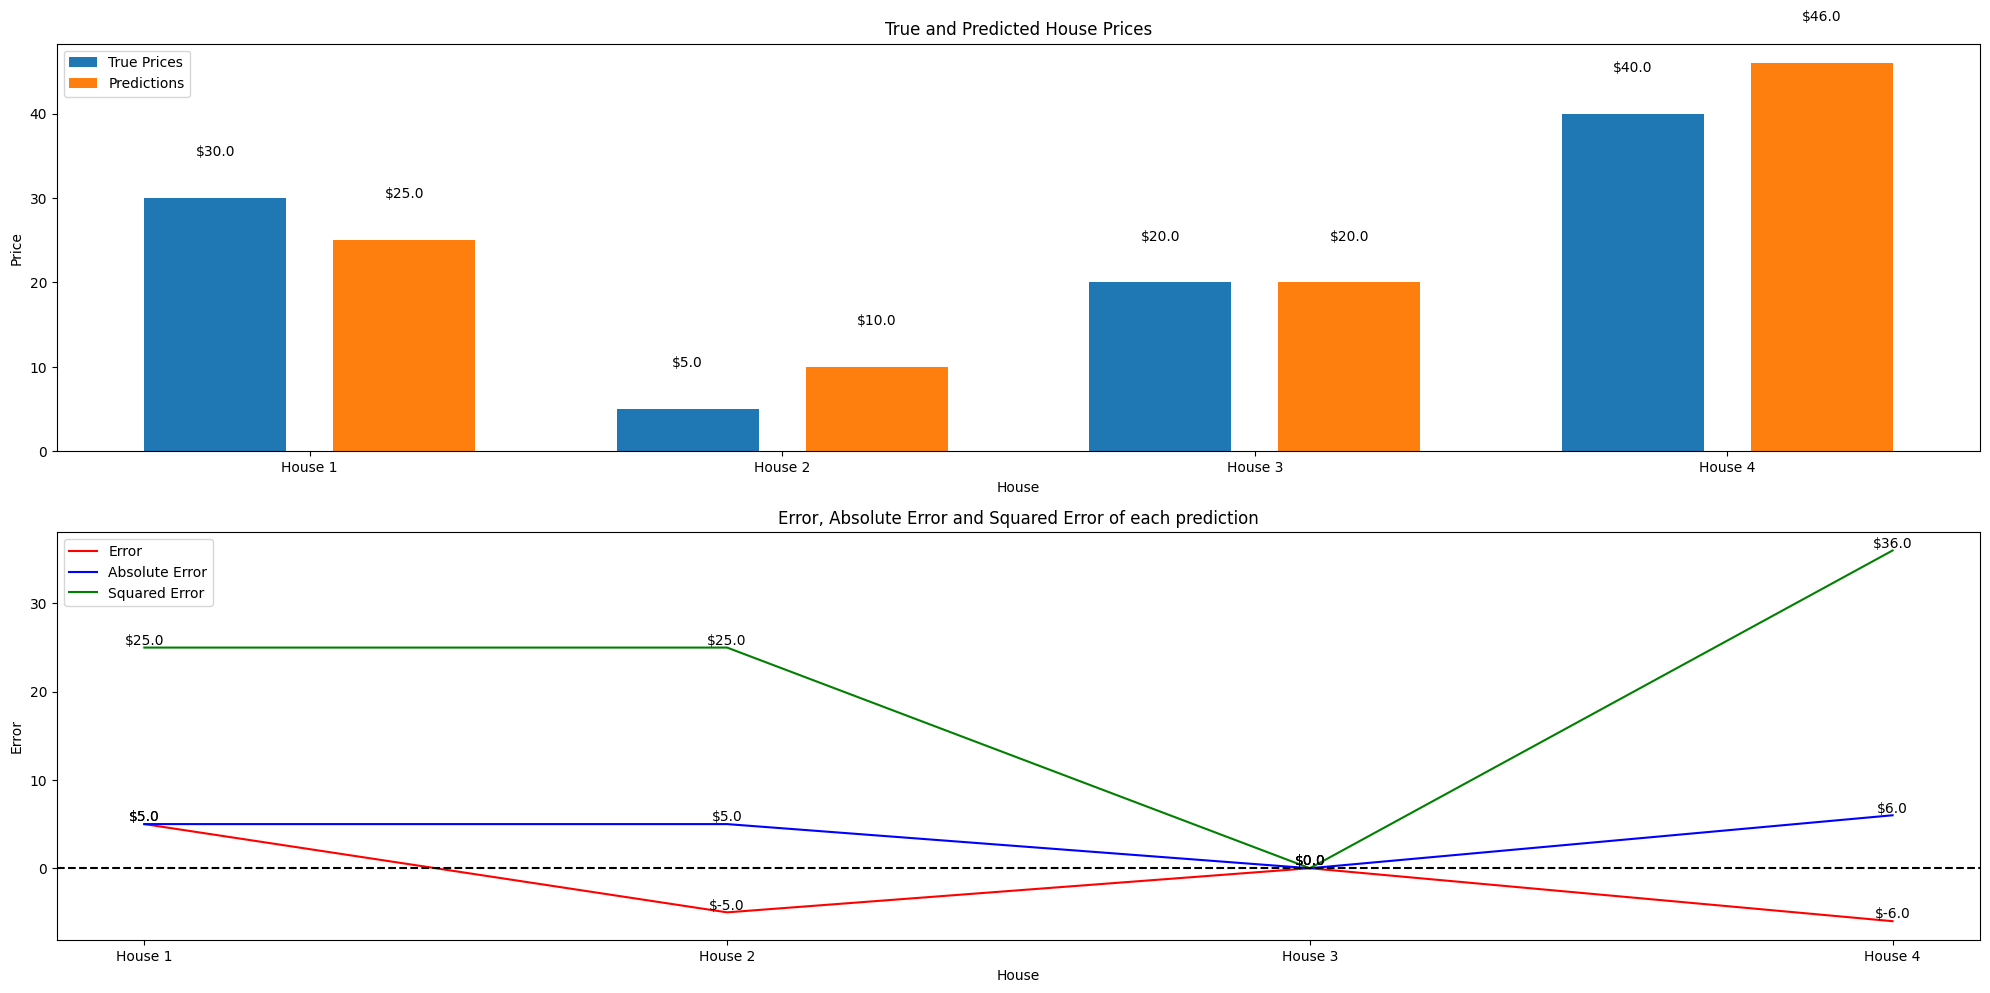

In [76]:
import matplotlib.pyplot as plt

# actual and predicted values multiplied by 1000 for a better visual
y_true = np.array([3, 0.5, 2, 4]) * 10
y_pred = np.array([2.5, 1, 2, 4.6]) * 10

# Calculation of errors
errors = y_true - y_pred




absolute_errors = np.abs(errors)

abe = np.mean(absolute_errors)
# Squaring the errors
squared_errors = np.square(errors)


cubed_errors = np.power(errors, 3)

mce = np.mean(cubed_errors)

quad_errors = np.power(errors, 4)

mqe = np.mean(quad_errors)
# Mean Squared Error
mse = np.mean(squared_errors)

# # Print the result
# print(f"The Mean Error of the predictions is {me}")
# print(f"The Error of the predictions are {errors}")

# Print the result
print(f"The Absolute Mean Error of the predictions is {abe}")
print(f"The Absolute Mean Error of the predictions are {absolute_errors}")

# Print the result
print(f"The Mean Squared Error of the predictions is {mse}")
print(f"The Error of the predictions are {squared_errors}")

# # Print the result
# print(f"The Mean Cubed Error of the predictions is {np.mean(cubed_errors)}")
# print(f"The Error of the predictions are {cubed_errors}")

# # Print the result
# print(f"The Mean Quad Error of the predictions is {np.mean(quad_errors)}")
# print(f"The Error of the predictions are {quad_errors}")




# Create a new figure
fig, axs = plt.subplots(2, figsize=(20, 10))

# Create an array with the indices
x = np.array(range(len(y_true)))

# Width of a bar 
width = 0.3       

# Plotting the prices
axs[0].bar(x - 0.2, y_true, width, label='True Prices')
axs[0].bar(x + 0.2, y_pred, width, label='Predictions')

# Adding price labels
for i in range(len(y_true)):
    axs[0].text(i - 0.2, y_true[i] + 5, f'${y_true[i]}', ha = 'center')
    axs[0].text(i + 0.2, y_pred[i] + 5, f'${y_pred[i]}', ha = 'center')

# Adding labels 
axs[0].set_xlabel('House') 
axs[0].set_ylabel('Price')
axs[0].set_title('True and Predicted House Prices') 

# Add a legend
axs[0].legend(loc='upper left')

# Plotting the errors and squared errors
axs[1].plot(x, errors, 'r-', label='Error')
axs[1].plot(x, absolute_errors, 'b-', label='Absolute Error')
axs[1].plot(x, squared_errors, 'g-', label='Squared Error')


# Adding labels for the errors
for i in range(len(errors)):
    axs[1].text(i, errors[i], f'${errors[i]}', ha = 'center', va='bottom')
    axs[1].text(i, squared_errors[i], f'${squared_errors[i]}', ha = 'center', va='bottom')
    axs[1].text(i, absolute_errors[i], f'${absolute_errors[i]}', ha = 'center', va='bottom')
    # axs[1].text(i, cubed_errors[i], f'${cubed_errors[i]}', ha = 'center', va='bottom')
    # axs[1].text(i, quad_errors[i], f'${quad_errors[i]}', ha = 'center', va='bottom')

# Adding labels 
axs[1].set_xlabel('House') 
axs[1].set_ylabel('Error')
axs[1].set_title('Error, Absolute Error and Squared Error of each prediction') 
axs[1].axhline(y=0, color='k', linestyle='--')
# Add a legend
axs[1].legend(loc='upper left')


# # Plotting the errors and squared errors

# # axs[2].axhline(y=me, color='r', linestyle='--', label='Mean Error of the predictions')
# axs[2].axhline(y=abe, color='b', linestyle='--', label='Absolute Mean Error of the predictions')
# axs[2].axhline(y=mse, color='g', linestyle='--', label='Mean Squared Error of the predictions')
# # axs[2].axhline(y=mce, color='y', linestyle='--', label='Mean Cubed Error of the predictions')
# # axs[2].axhline(y=mqe, color='m', linestyle='--', label='Mean Quad Error of the predictions')


# # Adding labels for the axs[2].axhlines
# # axs[2].text(0, me, f'${me}', ha = 'center', va='bottom')
# axs[2].text(0, abe, f'${abe}', ha = 'center', va='bottom')
# axs[2].text(0, mse, f'${mse}', ha = 'center', va='bottom')
# # axs[2].text(0, mce, f'${mce}', ha = 'center', va='bottom')
# # axs[2].text(0, mqe, f'${mqe}', ha = 'center', va='bottom')



# # Adding labels 
# axs[2].set_xlabel('House') 
# axs[2].set_ylabel('Error')
# axs[2].set_title('Mean Error, Absolute Mean Error and Mean Squared Error of the predictions'  ) 

# # Add a legend
# axs[2].legend(loc='upper left')

# Updating the x-axis ticks
for ax in axs:
    ax.set_xticks(x)
    ax.set_xticklabels([f'House {i+1}' for i in x])

# Display the plot
plt.tight_layout()
plt.show()

# Slide 3: MSE - Why Errors are Squared
Understanding Squared Errors

- Positive errors due to squaring
- Larger errors are more penalized


# Slide 4: MSE - Illustrative Example
Mean Squared Error (MSE) in Action

# insert brief explanation of the example


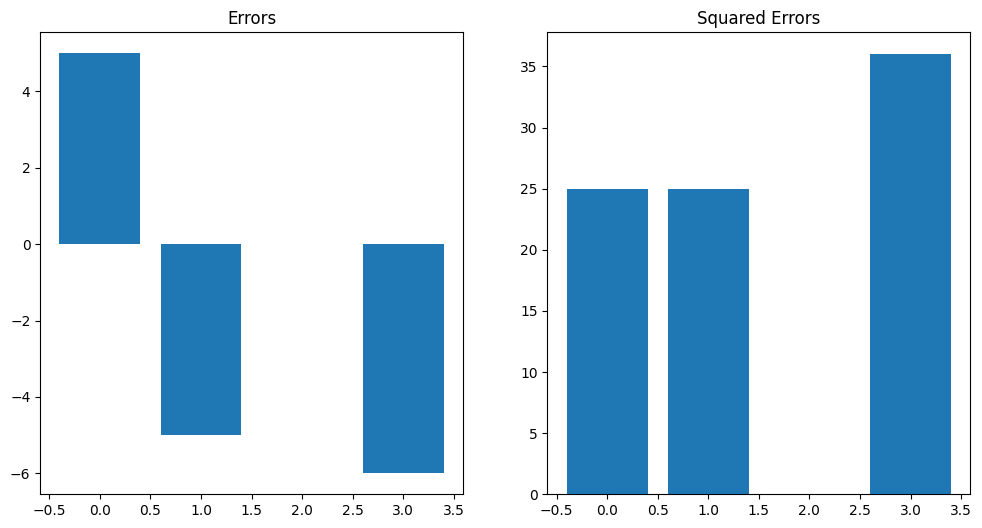

In [73]:
# Generate a plot demonstrating the error and squared error
import matplotlib.pyplot as plt

errors = y_true - y_pred
squared_errors = np.square(errors)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(len(errors)), errors)
plt.title('Errors')

plt.subplot(1, 2, 2)
plt.bar(range(len(squared_errors)), squared_errors)
plt.title('Squared Errors')

plt.show()


# Slide 5: Cross-Entropy Loss
Used for classification tasks

- Measures the performance of a classification model whose output is a probability value between 0 and 1


# Slide 6: Cross-Entropy - Probabilistic Predictions
Understanding Probabilistic Predictions

- Explanation of how models predict probabilities in classification
- Concept of target or label probabilities (one-hot encoding)


# Slide 7: Cross-Entropy - Illustrative Example
Cross-Entropy Loss in Action

# insert brief explanation of the example


In [74]:
# Demonstrate Cross-Entropy Loss with a simple example
from sklearn.metrics import log_loss

# actual and predicted values
y_true = [0, 0, 1, 1]
y_pred = [[.9, .1], [.8, .2], [.3, .7], [.01, .99]] # Probabilities for two classes

loss = log_loss(y_true, y_pred)
loss


0.1738073366910675

# Slide 8: Choice of Loss Function
Choosing the Right Loss Function

- MSE for regression tasks, Cross-Entropy for classification tasks
- Importance of matching the loss function to the problem at hand


# Slide 9: Recap and Questions
Recap and Questions

- Quick recap of key points
- Time for questions and discussion
